# COGS 118A - Final Project

# Insert title here

## Group members

- Sarbjot Singh
- Nathan Sit
- Daimeng Sun

# Abstract 

This project aims to train a classifier to help doctors determine if a patient has the indicators for heart disease and allow the doctors to move forward and run more tests bloodworks etc. We will be using data form a telephone survey that the CDC collects annually. This data is form their 2015 survey. We will be classifying this data to determine whether the patient has heart disease or not. We will use a decision tree classifier to do this. In this project, we will be selecting features for the decision tree first then tuning hyperparameters of the decision tree. We will use confusion matrix to determine the performance of the model. 

# Background

Waiting for Nathan's input

# Problem Statement

In this project, we will train a decision tree to classify whether an observation in our dataset has heart disease based on the relevant fetures given to us in our data. These features consist of the subject's Age, BP, smoking, Alcohol consumption, etc. Features that will be included to train the model will be decided by feature selection. Decision tree hyper parameters will be tuned using cross-validation.

# Data

Link to the dataset: www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/discussion/284985

This dataset is an overview of the BRFSS 2015 survey summarised by the author, optimized for performing a binary classification of heart disease. It contains 253,680 observations and 22 variables. <br><br>
Variables can be roughly classified into the following categories: quantitative biological information, for example age and BMI; categorical biological information, for example gender and disease history; binary daily activity, for example fruit/vegetable intake and exercise; binary living habit, for example heavy alcohol consumption or heavy smoking; and ordinal live quality, for example, levels of satisfaction toward physical and mental health. <br><br>
Some of the potentially critical variables we identified are: highBP or high blood pressure, binary; highChol or high cholesterol, binary; diabetes, ordinal; smoker, binary; and HvyAlcoholConsump or heavy alcohol consumption, binary. Meanwhile, we think it would be interesting to investigate if people’s financial stability may help with predicting heart diseases. For instance, we would like to investigate income, NoDocbcCost or doctor denied due to cost, and AnyHealthcare or health care coverage. <br><br>
All of the non-quantitative variables will need transformation. We can see how we could implement one-hot encoding, binary encoding, or ordinal encoding for our variables.

In [6]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Explanation of what each feature means: <br>
HeartDiseaseorAttack : has heart disease; what we try to predict; boolean<br>
HighBP : has high blood pressure; boolean<br>
HighChol : has high cholesterol; boolean<br>
CholCheck : has its cholesterol levels checked in a year; boolean<br>
BMI : body mass index; numerical<br>
Smoker : smoked at least 100 cigarettes, boolean<br>
Stroke : has had a stroke, boolean<br>
Diabetes : has diabetes, boolean<br>
PhysActivity : regularly attends physical excercise, boolean<br>
Fruits : regularly consumes fruits, boolean<br>
Veggies : regularly consumes vegatables, boolean<br>
HvyAlcoholConsump : considers themselves as heavy drinker, boolean<br>
AnyHealthcare : has healthcare coverage, boolean<br>
NoDocbcCost : ever decides not to go to doctors due to cost, boolean<br>
GenHlth : considers their general health on a scale of 1 (excellent) to 5 (poor), ordinal<br>
MentHlth : number of days with bad mental health in the past 30 days, numerical<br>
PhysHlth : number of days with bad physical health in the past 30 days, numerical<br>
DiffWalk : has difficulty walking, boolean<br>
Sex : gender, 0 is male, 1 is female, categorical<br>
Age : age, numerical<br>
Education : highest grade of school completed, on scale of 1 (never) to 6 (4-year college), ordinal<br>
Income : annual income, on scale of 1 (less than 10,000USD) to 8 (more than 75,000USD), ordinal<br>


Standard scaler from sklearn was used to transform numerical features, which include BMI, MentHlth, PhysHlth, and Age

In [7]:
from sklearn.preprocessing import StandardScaler

# fit scaler
sdScaler = StandardScaler()
sdScaler.fit(df[['BMI', 'MentHlth', 'PhysHlth', 'Age']])

# transform target features in place
df[['BMI', 'MentHlth', 'PhysHlth', 'Age']] = sdScaler.transform(df[['BMI', 'MentHlth', 'PhysHlth', 'Age']])
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.998592,1.233999,1.0,0.0,0.316900,4.0,3.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,-0.429630,-0.486592,0.0,0.0,-0.337933,6.0,1.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,3.617407,2.954590,1.0,0.0,0.316900,4.0,8.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.429630,-0.486592,0.0,0.0,0.971733,3.0,6.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.024926,-0.486592,0.0,0.0,0.971733,5.0,4.0


Onehot encoder from sklearn was used to transform categorical feature, sex

In [8]:
from sklearn.preprocessing import OneHotEncoder

# fit encoder
onehot = OneHotEncoder(handle_unknown='ignore')
onehot.fit(df[['Sex']])

# replace original column with transformed
df[onehot.get_feature_names_out(['Sex'])] = onehot.transform(df[['Sex']]).toarray()
df = df.drop(['Sex'], axis=1)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_0.0,Sex_1.0
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.998592,1.233999,1.0,0.316900,4.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,-0.429630,-0.486592,0.0,-0.337933,6.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,3.617407,2.954590,1.0,0.316900,4.0,8.0,1.0,0.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,-0.429630,-0.486592,0.0,0.971733,3.0,6.0,1.0,0.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,-0.024926,-0.486592,0.0,0.971733,5.0,4.0,1.0,0.0


# Proposed Solution

The ultimate goal is to create a classifier that accurately predicts heart disease prior to devastating outcomes. We plan to use selectKBest method of univariate feature selection from sklearn to remove all but the k highest scoring features of all features. Next, we will do a cross-validation for hyperparameter selection. GridSearchCV will be used to select the most optimal hyperparameters settings for the decision tree, including max depth, max features, and entropy measurement.<br><br>
From the same site where we got the dataset, there are a number of already established classifiers that we could use as a benchmark model to compare.

# Evaluation Metrics

We will use accuracy, precision and recall measurements to determine the performance of the model. These measurements will be displayed via a confusion matrix. Recall is especially important as we want to ensure that the people who show indications of having heart disease to go get followups with their doctors. We want to reduce the number of False Negatives, not classifying a patient with heart disease when they actually have it. The CDC released this data to the public, so it does not go against HIPPA. 


### Feature Selection

Sklearn SelectKBest was used to select 10 highest scoring features to train the decision tree. Default scoring method, f_classif was used, which ranks features by ANOVA F-value between label/feature in the dataset

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Divide whole dataset into X or y
X = df.copy().drop(['HeartDiseaseorAttack'], axis=1)
y = df['HeartDiseaseorAttack'].replace({1.0: 'True', 0.0: 'False'})

selector = SelectKBest(k=10)
# new training dataset with the 10 highest scoring features
X_new = selector.fit_transform(X, y) 

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=101)
top_10_features = selector.get_feature_names_out()
top_10_features

array(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Income'], dtype=object)

We will be using the 10 features above for the decision tree.

### Dataset Inbalance

After retrieving the 10 highest scoring features in relation to the predicted value, a basic decision tree with mostly default settings (except a manually determined max_depth=5) was trained using these features (train test split was done in the previous section). Visualizing this basic decision tree gave us information on hyperparameters like max_depth, so that we could better come up with hyperparameter settings later when we performed hyperparameters tuning. <br><br>
In addition, evaluation metrics and confusion matrix revealed that our dataset was very inbalanced, with almost 10 times more observations being negative cases than positive cases. This inbalance resulted in this basic decision tree having a very poor performance when predicting positive cases. 

In [11]:
# train the basic decision tree
from sklearn.tree import DecisionTreeClassifier

basic_clf = DecisionTreeClassifier(max_depth=5, random_state=101)
basic_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=101)

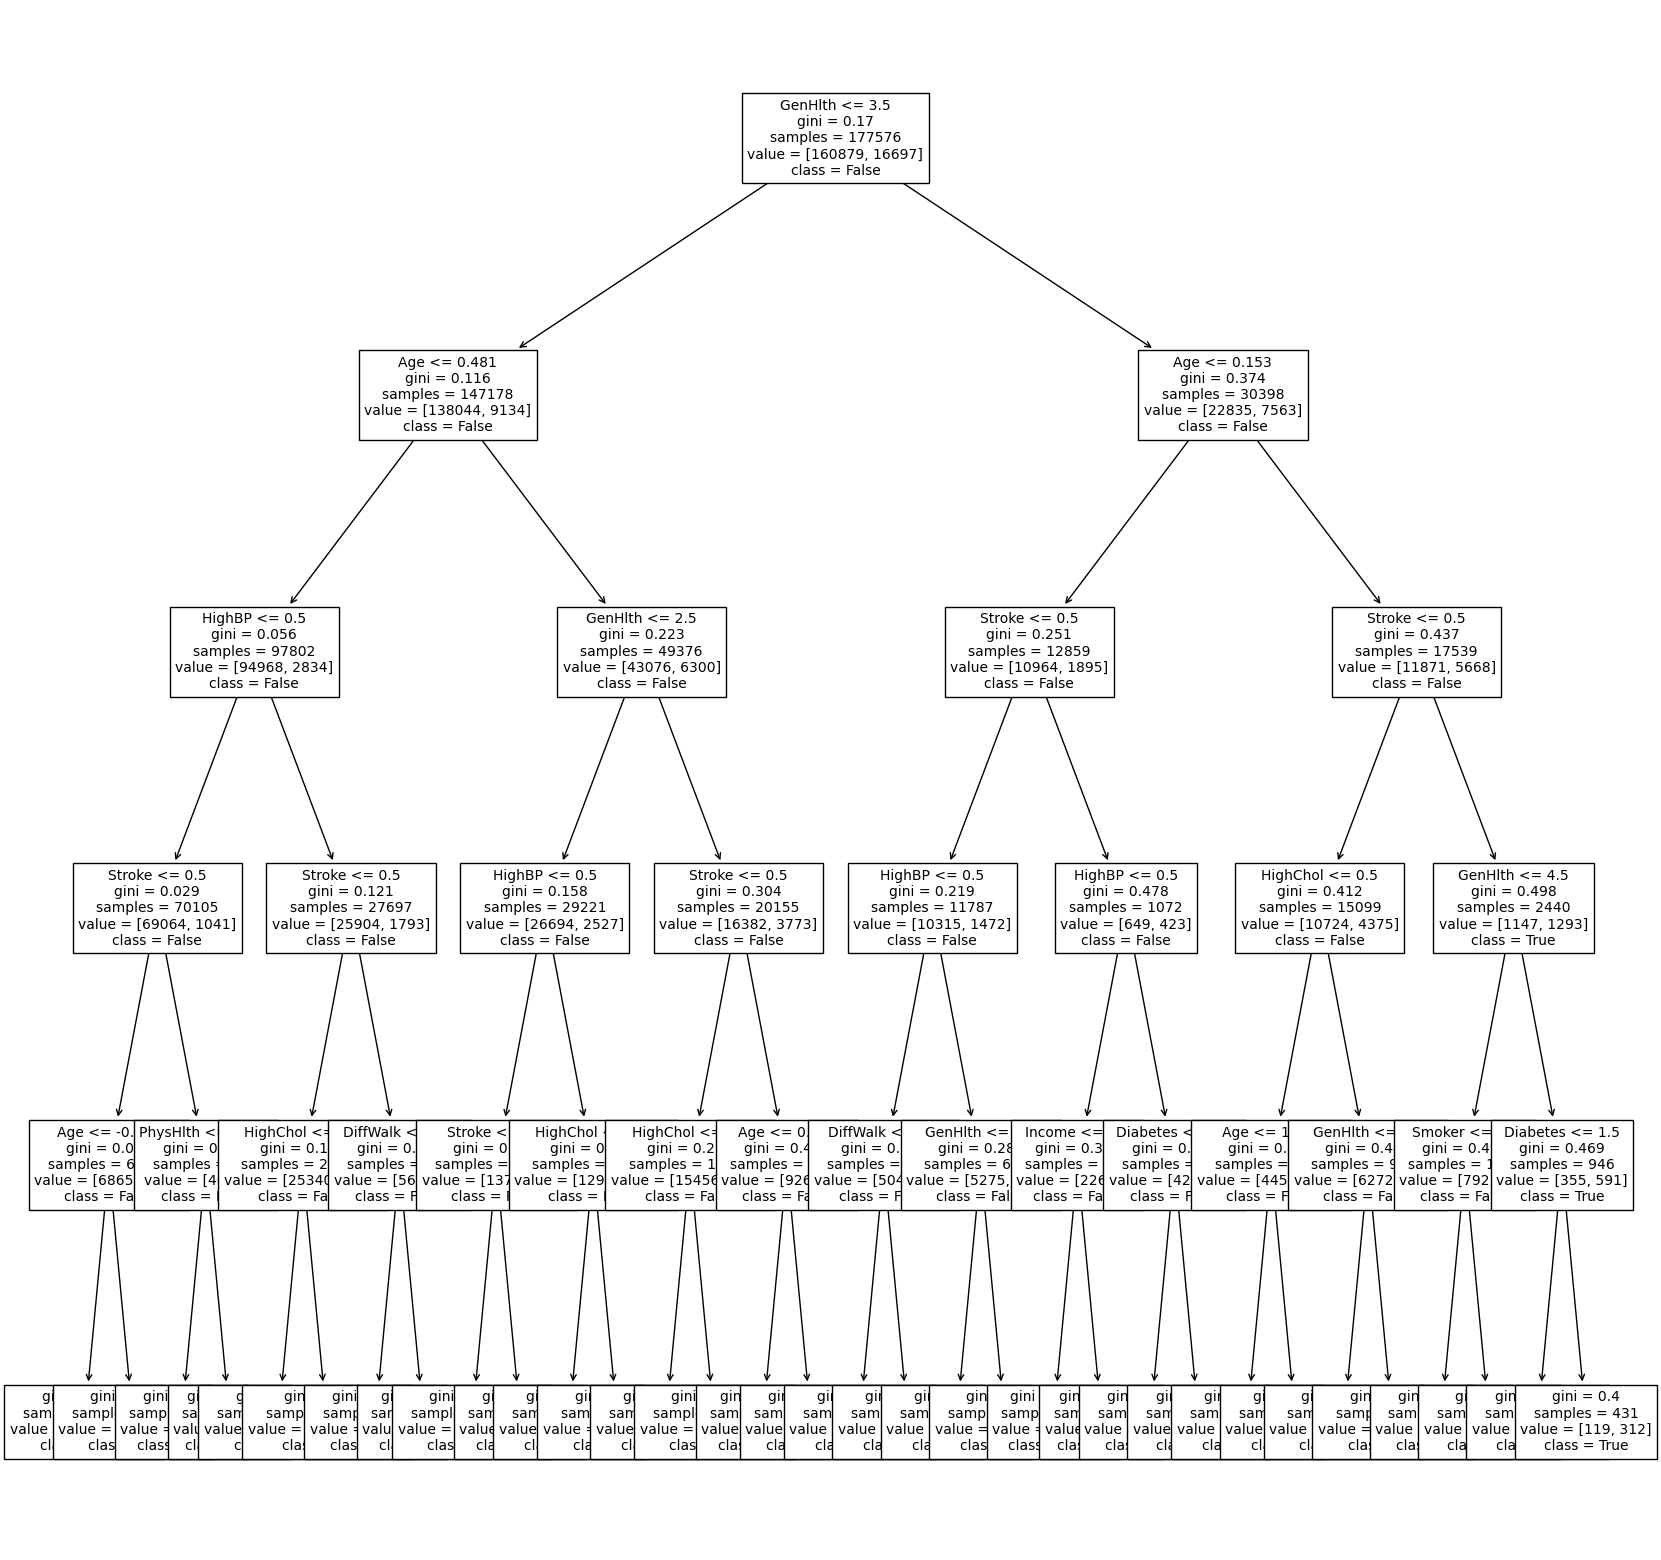

In [12]:
# visualizing the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(20,20))
plot_tree(basic_clf, 
          feature_names=['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
                           'PhysHlth', 'DiffWalk', 'Age', 'Income'], 
          class_names=y_train.drop_duplicates().to_list(),
          ax=axes,
          fontsize=10)

plt.show()

This basic tree visualization helped determine the CV fold number for GridSearchCV hyperperameters tuning. Additionally, it showed that it was more critical to tune the max_depth than min_samples_split or min_samples_leaf. 

training set accuracy (n=177576): 0.907
test set accuracy (n=76104): 0.906

classificiation report on test set performance
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     68908
        True       0.54      0.07      0.13      7196

    accuracy                           0.91     76104
   macro avg       0.72      0.53      0.54     76104
weighted avg       0.88      0.91      0.87     76104




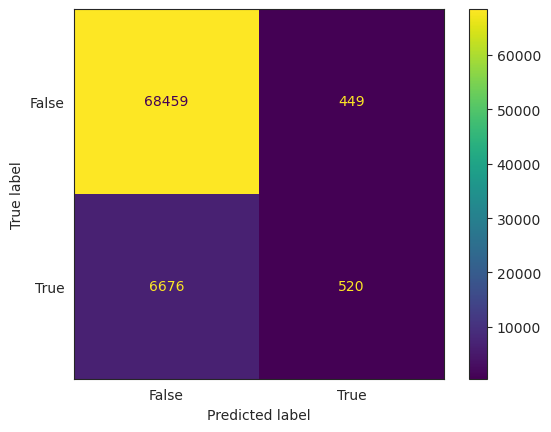

In [13]:
# evaluate basic tree
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

def evaluate_tree(tree, X_train, y_train):
    yhat_test = tree.predict(X_test)
    yhat_train = tree.predict(X_train)
    
    with sns.axes_style('white'):
        ConfusionMatrixDisplay.from_predictions(y_test, yhat_test)
    
    acc_train = accuracy_score(y_train, yhat_train)

    # calculate the test set error
    acc_test = accuracy_score(y_test, yhat_test) # YOUR CODE HERE

    print(f'training set accuracy (n={y_train.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_test.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_test, yhat_test))
    print()

evaluate_tree(basic_clf, X_train, y_train)

Evaluation metrics and confusion matrix showed there were almost 10 times more negative cases than positive cases in the dataset. This inbalance is problematic: this basic decision tree is not able to identify positive cases properly. A f1-score of 0.13 is unacceptable, especially for a decision tree that aims to identify heart diseases. False negatives should be minimized with highest priority. <br><br>A weighted class approach was used to compensate for the inbalance of the dataset

### Metigate the Effect of Dataset Inbalance with Weighted Class

By default, negative cases and positive cases have the same weight during training. However, to combat the overwhelmingly more negative cases, a weight of 10 was applied to all the positive cases. This was able to improve tree's ability to predict positive cases significantly.

In [14]:
# weighted tree training
weighted_clf = DecisionTreeClassifier(max_depth=5, class_weight={'False':1, 'True':10}, random_state=101)
weighted_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'False': 1, 'True': 10}, max_depth=5,
                       random_state=101)

training set accuracy (n=177576): 0.734
test set accuracy (n=76104): 0.731

classificiation report on test set performance
              precision    recall  f1-score   support

       False       0.97      0.73      0.83     68908
        True       0.23      0.76      0.35      7196

    accuracy                           0.73     76104
   macro avg       0.60      0.74      0.59     76104
weighted avg       0.90      0.73      0.79     76104




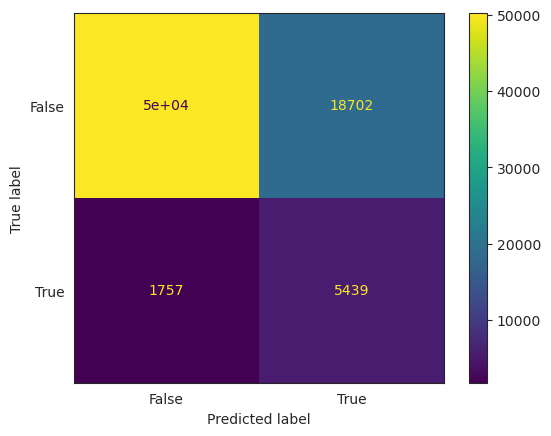

In [15]:
evaluate_tree(weighted_clf, X_train, y_train)

While applying a weight to positive cases increased the tree's ability to predict positive cases significantly, we decided not to tune the weight as one of the hyperparameters. This is because a higher weighted positive cases is correlated with lower scoring during GridSearchCV, thus a lower weight is almost always preferred over higher weights. A manually decided weight of 10 is applyed to positive cases, due to negative cases were roughly 10 times more than positive cases.

### Hyperparameters Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ('gini', 'entropy'),
          'splitter' : ('best', 'random'),
          'max_depth' : (5, 7, 9, 12, 15)}

final_clf = DecisionTreeClassifier(class_weight={'False':1, 'True':10}, random_state=101)
best_model = GridSearchCV(final_clf, params, cv=5, verbose=3)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=5, splitter=best;, score=0.718 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, splitter=best;, score=0.740 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, splitter=best;, score=0.693 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, splitter=best;, score=0.741 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, splitter=best;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, splitter=random;, score=0.699 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, splitter=random;, score=0.696 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, splitter=random;, score=0.660 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, splitter=random;, score=0.678 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, splitter=random;, score=0.646 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth

[CV 5/5] END criterion=entropy, max_depth=12, splitter=random;, score=0.726 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=15, splitter=best;, score=0.745 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=15, splitter=best;, score=0.753 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=15, splitter=best;, score=0.749 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=15, splitter=best;, score=0.752 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=15, splitter=best;, score=0.751 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=15, splitter=random;, score=0.740 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=15, splitter=random;, score=0.741 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=15, splitter=random;, score=0.751 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=15, splitter=random;, score=0.740 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=15, splitter=rando

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={'False': 1,
                                                            'True': 10},
                                              random_state=101),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (5, 7, 9, 12, 15),
                         'splitter': ('best', 'random')},
             verbose=3)

In [17]:
# best hyperparameters setting found
best_model.best_params_, best_model.best_score_

({'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'},
 0.7504054964125204)

training set accuracy (n=177576): 0.790
test set accuracy (n=76104): 0.748

classificiation report on test set performance
              precision    recall  f1-score   support

       False       0.95      0.76      0.85     68908
        True       0.22      0.64      0.32      7196

    accuracy                           0.75     76104
   macro avg       0.58      0.70      0.58     76104
weighted avg       0.88      0.75      0.80     76104




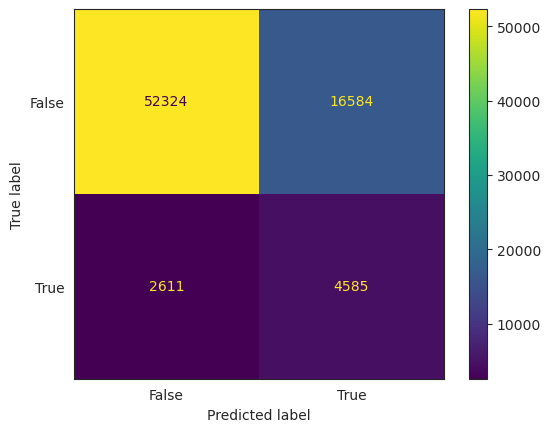

In [18]:
# evaluate the best model
evaluate_tree(best_model, X_train, y_train)

# Discussion

### Result and Limitation

Given all positive cases a weight of 10, the best model found by GridSearchCV still isn't able to predict positive cases with high accuracy. Due to the inbalance in the dataset, a lot of the evaluation metrics are not good representation of the decision tree's performance. For instance, precision and f1-score are all made low because of the large numbers of false positives. We decided to focus on recall when evaluating this decision tree. <br><br>
A recall of 0.64 certainly has room for improvement. Some of the features we selected for the decision tree training may not have strong impact on heart disease, or they may be too subjective. For example, health ratings (physical and mental) are subjective ratings made by the survey takers themselves, lacking scientific aproof. In addition, the way we addressed the dataset inbalance may not be good enough. One alternative way to address it could be increasing positive cases numbers by resampling. Or more than one method could be employed.



### Ethics & Privacy

When we are dealing with a patient's health data it is important to ensure that this data is secure and that the patient in this data stays anonymous. The data is anonymized, so the privacy of the patients is intact. The CDC released this data to the public, as they complied with HIPPA there should not be any privacy concerns. 

### Conclusion

Using sklearn feature selection and hyperparameters tuning, we were able to train a decision tree that is able to moderately identify potential heart disease risks in people of all ages, based on common health factors. There are room for improvement, however, if some of the features we used could be substituted by more scientific data. For a decision tree that aims to identify heart diseases risks, its ability to predict positive cases correctly is crucial. Mean while, the inbalance of dataset has hindered the decision tree's ability to predict positive cases. A better approach to address this inbalance will improve the tree's performance. 

# Footnotes
Waiting for Nathan's input
